# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


In [3]:
geo_data.get_data()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0   100  200  600  0.2501  0.3126  0.5626   rock2   
               1   500  200  600  0.5001  0.3126  0.5626   rock2   
               2   900  200  600  0.7501  0.3126  0.5626   rock2   
               3   100  800  600  0.2501  0.6876  0.5626   rock2   
               4   500  800  600  0.5001  0.6876  0.5626   rock2   
               5   900  800  600  0.7501  0.6876  0.5626   rock2   
               6   100  200  400  0.2501  0.3126  0.4376   rock1   
               7   500  200  400  0.5001  0.3126  0.4376   rock1   
               8   900  200  400  0.7501  0.3126  0.4376   rock1   
               9   100  800  400  0.2501  0.6876  0.4376   rock1   
               10  500  800  400  0.5001  0.6876  0.4376   rock1   
               11  900  800  400  0.7501  0.6876  0.4376   rock1   
orientations   0   500  500  600  0.5001  0.5001  0.5626   rock2   
               1   500  500  400  0.5001  0.5001  0.4376   rock1   

                           series  id  order_series        smooth  \
surface_points 0   Default series   1             1  1.000000e-08   
               1   Default series   1             1  1.000000e-08   
               2   Default series   1             1  1.000000e-08   
               3   Default series   1             1  1.000000e-08   
               4   Default series   1             1  1.000000e-08   
               5   Default series   1             1  1.000000e-08   
               6   Default series   2             1  1.000000e-08   
               7   Default series   2             1  1.000000e-08   
               8   Default series   2             1  1.000000e-08   
               9   Default series   2             1  1.000000e-08   
               10  Default series   2             1  1.000000e-08   
               11  Default series   2             1  1.000000e-08   
orientations   0   Default series   1             1  1.000000e-02   
               1   Default series   2             1  1.000000e-02   

                            G_x           G_y  G_z  dip  azimuth  polarity  
surface_points 0            NaN           NaN  NaN  NaN      NaN       NaN  
               1            NaN           NaN  NaN  NaN      NaN       NaN  
               2            NaN           NaN  NaN  NaN      NaN       NaN  
               3            NaN           NaN  NaN  NaN      NaN       NaN  
               4            NaN           NaN  NaN  NaN      NaN       NaN  
               5            NaN           NaN  NaN  NaN      NaN       NaN  
               6            NaN           NaN  NaN  NaN      NaN       NaN  
               7            NaN           NaN  NaN  NaN      NaN       NaN  
               8            NaN           NaN  NaN  NaN      NaN       NaN  
               9            NaN           NaN  NaN  NaN      NaN       NaN  
               10           NaN           NaN  NaN  NaN      NaN       NaN  
               11           NaN           NaN  NaN  NaN      NaN       NaN  
orientations   0   1.000000e-12  1.000000e-12  1.0  0.0     90.0       1.0  
               1   1.000000e-12  1.000000e-12  1.0  0.0     90.0       1.0

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


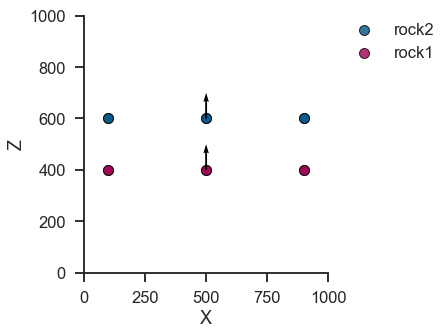

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [7]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

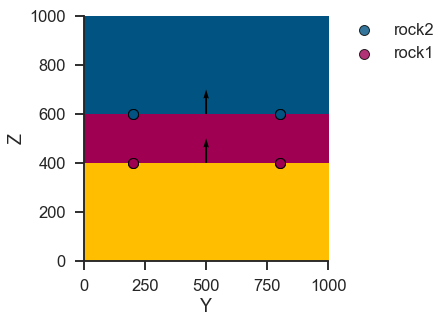

In [8]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

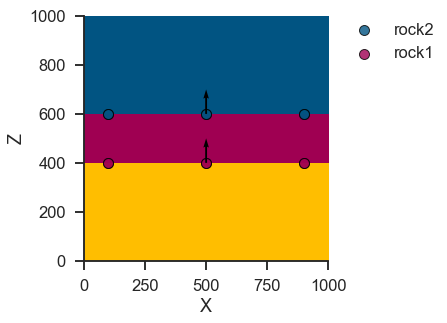

In [9]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                    direction='y', show_data=True)